# Wind direction checks L0

In [2]:
from diive.pkgs.corrections.winddiroffset import WindDirOffset
from diive.core.plotting.heatmap_datetime import HeatmapDateTime
from diive.core.io.files import load_parquet

In [3]:
SOURCEFILE = r"01.2_OPENLAG_EDDYPRO_FLUXNET_OUTPUT_2016-2024.parquet"
df = load_parquet(filepath=SOURCEFILE)
df

Loaded .parquet file 01.2_OPENLAG_EDDYPRO_FLUXNET_OUTPUT_2016-2024.parquet (0.264 seconds).
    --> Detected time resolution of <30 * Minutes> / 30min 


,AIR_CP,AIR_DENSITY,AIR_MV,AIR_RHO_CP,AOA_METHOD,AXES_ROTATION_METHOD,BADM_HEIGHTC,BADM_INSTPAIR_EASTWARD_SEP_GA_CH4,BADM_INSTPAIR_EASTWARD_SEP_GA_CO2,BADM_INSTPAIR_EASTWARD_SEP_GA_H2O,BADM_INSTPAIR_EASTWARD_SEP_GA_NONE,BADM_INSTPAIR_HEIGHT_SEP_GA_CH4,BADM_INSTPAIR_HEIGHT_SEP_GA_CO2,BADM_INSTPAIR_HEIGHT_SEP_GA_H2O,BADM_INSTPAIR_HEIGHT_SEP_GA_NONE,...,W_T_SONIC_COV_IBROM_N0004,W_T_SONIC_COV_IBROM_N0008,W_T_SONIC_COV_IBROM_N0016,W_T_SONIC_COV_IBROM_N0032,W_T_SONIC_COV_IBROM_N0065,W_T_SONIC_COV_IBROM_N0133,W_T_SONIC_COV_IBROM_N0277,W_T_SONIC_COV_IBROM_N0614,W_T_SONIC_COV_IBROM_N1626,W_UNROT,W_U_COV,W_VM97_TEST,W_ZCD,ZL,ZL_UNCORR
TIMESTAMP_MIDDLE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 15:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-11 15:45:00,1005.36,1.13966,0.025415,1145.77,0.0,1.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.730810,-1.432500,801010000.0,0.0,0.009173,0.009198
2016-01-11 16:15:00,1005.38,1.13546,0.025509,1141.57,0.0,1.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.052890,-1.801750,801010000.0,0.0,0.008916,0.008932
2016-01-11 16:45:00,1005.40,1.13222,0.025582,1138.33,0.0,1.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.925269,-1.538810,800010000.0,1.0,-0.024976,-0.025218
2016-01-11 17:15:00,1005.41,1.13030,0.025625,1136.42,0.0,1.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.183020,-1.688030,800010000.0,0.0,-0.000850,-0.000857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 22:45:00,1007.82,1.14946,0.025191,1158.44,0.0,1.0,37.0,NaN,1.0,1.0,NaN,NaN,-1.0,-1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.065927,-0.196501,800000000.0,9.0,-0.097906,-0.098464
2024-12-31 23:15:00,1007.71,1.14668,0.025253,1155.52,0.0,1.0,37.0,NaN,1.0,1.0,NaN,NaN,-1.0,-1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.115006,-0.316383,800000000.0,3.0,-0.049540,-0.051087
2024-12-31 23:45:00,1007.78,1.15011,0.025177,1159.05,0.0,1.0,37.0,NaN,1.0,1.0,NaN,NaN,-1.0,-1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.087622,0.098774,800000000.0,10.0,0.047854,0.048012


Working on year 2016 ...
Working on year 2017 ...
Working on year 2018 ...
Working on year 2019 ...
Working on year 2020 ...
Working on year 2021 ...
Working on year 2022 ...
Working on year 2023 ...
Working on year 2024 ...
     YEAR  OFFSET
0  2016.0    -2.0
1  2017.0    -3.0
2  2018.0     1.0
3  2019.0     0.0
4  2020.0     1.0
5  2021.0     1.0
6  2022.0     1.0
7  2023.0     2.0
8  2024.0     0.0
TIMESTAMP_MIDDLE
2016-01-11 15:45:00    241.971
2016-01-11 16:15:00    255.937
2016-01-11 16:45:00    253.310
2016-01-11 17:15:00    248.199
2016-01-11 18:15:00    243.642
                        ...   
2024-12-31 21:45:00    285.590
2024-12-31 22:15:00    282.067
2024-12-31 22:45:00    280.836
2024-12-31 23:15:00    279.175
2024-12-31 23:45:00    302.393
Name: WD, Length: 149053, dtype: float64


F:\Sync\luhk_work\20 - CODING\21 - DIIVE\diive\diive\core\plotting\heatmap_base.py:100: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


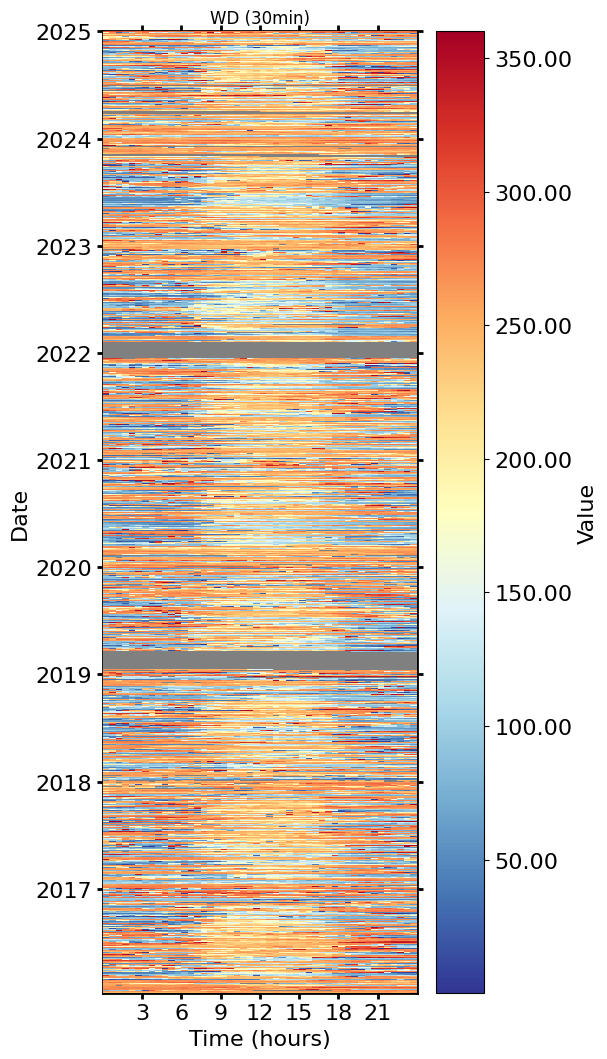

In [4]:
col = 'WD'
wd = df[col].copy()

# Prepare input data
wd = wd.loc[wd.index.year <= 2024]
wd = wd.dropna()

wds = WindDirOffset(winddir=wd, offset_start=-50, offset_end=50, hist_ref_years=[2024], hist_n_bins=360)
yearlyoffsets_df = wds.get_yearly_offsets()
print(yearlyoffsets_df)
print(wd)
HeatmapDateTime(series=wd).show()

# s_corrected = wds.get_corrected_wind_directions()
# print(s_corrected)
# HeatmapDateTime(series=s_corrected).show()

In [5]:
yearlyoffsets_df

,YEAR,OFFSET
0,2016.0,-2.0
1,2017.0,-3.0
2,2018.0,1.0
3,2019.0,0.0
4,2020.0,1.0
5,2021.0,1.0
6,2022.0,1.0
7,2023.0,2.0
8,2024.0,0.0
